In [1]:
from google.colab import files
uploaded = files.upload()

Saving mnist.csv to mnist.csv


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import copy
import math

import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1



In [0]:
#라벨 벡터로
NumofLabel = 10
labelvector_train = []
labelvector_test = []
labeltemp = []

for i in range(1000):
  for j in range(NumofLabel):
    if list_label[i] == j:
      labeltemp.append(1)
    else:
      labeltemp.append(0)
  labelvector_train.append(copy.deepcopy(labeltemp))
  labeltemp.clear()
for i in range(9000):
  for j in range(NumofLabel):
    if list_label[i+1000] == j:
      labeltemp.append(1)
    else:
      labeltemp.append(0)
  labelvector_test.append(copy.deepcopy(labeltemp))
  labeltemp.clear()

In [0]:
#데이터 분류
list_train = []
for i in range(1000):
    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_vector = im_vector.tolist()
    im_vector.insert(0,1)
    list_train.append(copy.deepcopy(im_vector))

list_test = []
label_test = []
for i in range(9000):
    label       = list_label[1000+i]
    im_vector   = list_image[:, 1000+i]
    im_vector = im_vector.tolist()
    im_vector.insert(0,1)
    list_test.append(copy.deepcopy(im_vector))
    label_test.append(copy.deepcopy(label))




In [0]:
#임의의 세타값 설정

thetaA=np.random.randn((int)(size_row*size_col+1),(int)(size_row*size_col/4))
thetaB=np.random.randn((int)(size_row*size_col/4+1), (int)(size_row*size_col/16))
thetaD=np.random.randn((int)(size_row*size_col/16+1), NumofLabel)


In [0]:
#fully connected and sigmoid calculation
def compute_matrix (theta, data):
  z = np.dot(data,theta)
  sigz = []
  temp = []
  for i in z:
    for j in i:
      temp.append(1.0/(1+np.exp(-j)))
    sigz.append(copy.deepcopy(temp))
    temp.clear()

  return sigz
 

In [0]:
#Compute prediction
def compute_prediction(thetaA, thetaB, thetaD, data):
  prediction = compute_matrix(thetaA, data)
  for i in prediction:
    i.insert(0,1.0)
  #prediction.insert(0,1.0)
  a = copy.deepcopy(prediction)
  prediction = compute_matrix(thetaB, prediction)
  #prediction.insert(0,1.0)
  for i in prediction:
    i.insert(0,1.0)
  b = copy.deepcopy(prediction)
  prediction = compute_matrix(thetaD, prediction)

  return prediction, b, a



# Objective Function
def compute_cost(thetaA, thetaB, thetaD, data, l, lam):
  prediction, b, a = compute_prediction(thetaA, thetaB, thetaD, data)
  m = len(prediction)

  J = 0.0
  for i in range(int(m)):
    for j in range(NumofLabel):
      J += -l[i][j]*np.log(prediction[i][j]) - (1-l[i][j])*np.log(1-prediction[i][j])
  J = J/m
  n = len(thetaA) + len(thetaB) + len(thetaD)
  k = np.sum(thetaA*thetaA) + np.sum(thetaB*thetaB) + np.sum(thetaD*thetaD)
  k = (lam * k)/n
  J = J - k

  return J





In [0]:
def inv_sig(x):
  x = np.array(x)
  x = x.flatten()
  res = 0
  for i in x:
    res = res + i*(i-i)
  return res

In [0]:
#제일 큰 값 찾기

def find_big(list):
  big = list[0]
  result = 0
  for i in range(len(list)):
    if list[i] > big:
      big = list[i]
      result = i
  return result


In [0]:
# get theta, J_history, accuracy_history
def back_prop(thetaA, thetaB, thetaD, data, l, lam, alpha, num, t_data, t_label):
  J_history_tr=[]
  J_history_tr.append(compute_cost(thetaA, thetaB, thetaD, data, l, lam))
  J_history_t=[]
  J_history_t.append(compute_cost(thetaA, thetaB, thetaD, t_data, t_label, lam))
  accuracy_history_train = []
  accuracy_history_test = []

  for i in range(num):
    prediction, b, a = compute_prediction(thetaA, thetaB, thetaD, data)
    prediction_test, b_t, a_t = compute_prediction(thetaA, thetaB, thetaD, t_data)
    prediction = np.array(prediction)
    l = np.array(l)
    loss = prediction - l
    

    #thetaD 업데이트
    thetaD = thetaD - (alpha * (np.dot(np.transpose(b), loss) + lam * thetaD))
    #thetaB 업데이트
    t = np.dot(thetaD, loss.T)
    t2 = inv_sig(b) * t
    t = np.dot(t2, a)
    t = (alpha * (t[1:len(t)] + lam * thetaB.T)).T
    thetaB = thetaB - t
    #thetaA 업데이트
    t = np.dot(thetaB, t2[1:len(t2)])
    t = inv_sig(a) * t
    t = np.dot(t, data)
    t = (alpha * (t[1:len(t)]+ lam * thetaA.T)).T
    thetaA = thetaA - t
   



    J_history_tr.append(compute_cost(thetaA, thetaB, thetaD, data, l, lam))
    J_history_t.append(compute_cost(thetaA, thetaB, thetaD, t_data, t_label, lam))
    
    temp = 0 
    for j in range(len(prediction)):
      if l[j][find_big(prediction[j])] == 1:
        temp = temp + 1
    accuracy_history_train.append(copy.deepcopy(temp))
    
    temp = 0 
    for j in range(len(prediction_test)):
      if t_label[j][find_big(prediction_test[j])] == 1:
        temp = temp + 1
    accuracy_history_test.append(copy.deepcopy(temp))
  

  return thetaA, thetaB, thetaD, J_history_tr, J_history_t, accuracy_history_train, accuracy_history_test



In [0]:
alpha = [0.001, 0.0006, 0.0001]
labelvector_train = np.array(labelvector_train,dtype=np.float32)
list_train = np.array(list_train,dtype=np.float32)
lam = 0.0000005
thetaA, thetaB, thetaD, J_history_tr0, J_history_t0, accuracy_h_tr0, accuracy_h_t0 = back_prop(thetaA, thetaB, thetaD, list_train, labelvector_train, lam, alpha[0], 30, list_test, labelvector_test)
thetaA, thetaB, thetaD, J_history_tr1, J_history_t1, accuracy_h_tr1, accuracy_h_t1 = back_prop(thetaA, thetaB, thetaD, list_train, labelvector_train, lam, alpha[1], 250, list_test, labelvector_test)
thetaA, thetaB, thetaD, J_history_tr2, J_history_t2, accuracy_h_tr2, accuracy_h_t2 = back_prop(thetaA, thetaB, thetaD, list_train, labelvector_train, lam, alpha[2], 30, list_test, labelvector_test)




In [0]:
J_history_tr = J_history_tr0 + J_history_tr1 + J_history_tr2
J_history_t = J_history_t0 + J_history_t1 + J_history_t2

accuracy_h_tr = accuracy_h_tr0 + accuracy_h_tr1 + accuracy_h_tr2
accuracy_h_t = accuracy_h_t0 + accuracy_h_t1 + accuracy_h_t2
accuracy_train = []
accuracy_test = []
for i in range(len(accuracy_h_tr)):
  accuracy_train.append(accuracy_h_tr[i]/1000)
for i in range(len(accuracy_h_t)):
  accuracy_test.append(accuracy_h_t[i]/9000)

In [0]:
#최종 세타 적용
p,a,b = compute_prediction(thetaA, thetaB, thetaD, list_test)

temp = 0
listofimg= []
notlist = []
listlabel = []
notlistlabel=[]
for i in range(len(p)):
  if labelvector_test[i][find_big(p[i])] == 1:
    temp = temp + 1
    listofimg.append(i)
    listlabel.append(copy.deepcopy(find_big(p[i])))

  else:
    notlist.append(i)
    notlistlabel.append(copy.deepcopy(find_big(p[i])))




#1. Plot the training error

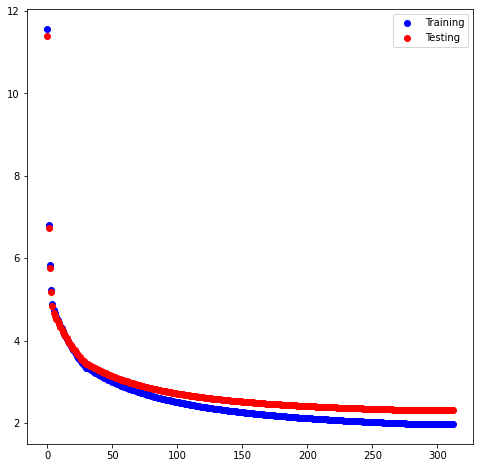

In [23]:
#Plot the training error


plt.figure(figsize=(8, 8))
plt.scatter(range(len(J_history_tr)), J_history_tr, c='blue', label = "Training")
plt.scatter(range(len(J_history_t)), J_history_t, c='red', label = "Testing")
plt.legend(loc='upper right')
plt.show()







#2. Plot the training accuracy

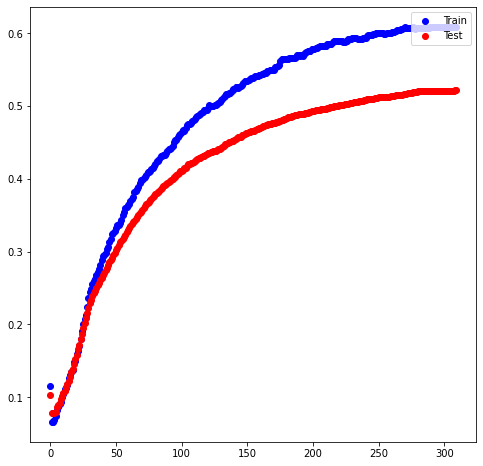

In [24]:
#Plot the training accuracy

plt.figure(figsize=(8, 8))
plt.scatter(range(len(accuracy_train)), accuracy_train, c='blue', label = "Train")
plt.scatter(range(len(accuracy_test)), accuracy_test, c='red', label = "Test")

plt.legend(loc='upper right')
plt.show()

#3. Final training accuracy

In [25]:
#Write down the final training accuracy
print(accuracy_train[len(accuracy_train)-1])
print(accuracy_test[len(accuracy_test)-1])

0.609
0.5214444444444445


#4. Plot the classification example

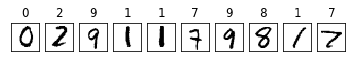

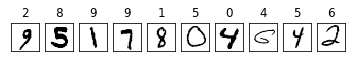

In [26]:

f1 = plt.figure(1)

for i in range(10):
  label       = listlabel[i]
  im_vector   = list_image[:, 1000+listofimg[i]]
  im_matrix   = im_vector.reshape((size_row, size_col))

  plt.subplot(1, 10, i+1)
  plt.title(label)
  plt.imshow(im_matrix, cmap='Greys', interpolation='None')

  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()

f1 = plt.figure(1)
i = 0

for i in range(10):
  label       = notlistlabel[i]
  im_vector   = list_image[:, 1000+notlist[i]]
  im_matrix   = im_vector.reshape((size_row, size_col))

  plt.subplot(1, 10, i+1)
  plt.title(label)
  plt.imshow(im_matrix, cmap='Greys', interpolation='None')

  frame   = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()


    
